<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/mvp-analise-de-dados-e-boas-praticas/MVP_CD_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

## Felipe Marques Moreira

## 1. Definição do Problema

O dataset usado neste projeto será o **Adult**, proveniente originalmente do **UC Irvine Machine Learning Repository** que contém um censo de renda dos cidadãos dos EUA. Seu objetivo é prever se a renda de uma pessoa ultrapassa U$ 50.000,00 (50K) considerando vários atributos que abrange sua vida pessoal e profissional. Este é um problema de classificação clássico de algiritimos de aprendizado supervisionado em que, baseado nos atributos do pesquisado, nós podemos prever se ele ganha acima de 50K ou não.

Como premissa, devemos ter em mente que boa parte dos atributos (principalmente os qualitativos) desse dataset considera a estrutura social dos EUA. Como exemplo, iremos ver que a hierarquia educacional dos EUA é bem diferente da nossa, com a existência de valores como "HS-grad", "Prof-school" e "Assoc-acdm", que não existem no Brasil.

Não foi detectada nenhuma restrição inicial para usar esse dataset, ou seja, nenhuma modificação ou corte na quantidade de registros precisou ser feita.

Os atributos apresentados no dataset possui valores tanto numericos quanto em caracteres que deverão ser devidamente explorados e caso necessário normalizados/padronizados. Para mais detalhes sobre este dataset, consulte: https://archive.ics.uci.edu/dataset/2/adult. Segue abaixo a descrição dos atributos:

**Informações sobre as colunas:**

1. **workclass** - classe de trabalho da pessoa (público, privado etc)
2. **fnlwgt** — um peso designado a combinação geral dos atributos (estima quantas pessoas pertencem a determinada combinação)
3. **education** - escolaridade da pessoa
4. **education-num** - quantos anos a pessoa estudou
5. **marital-status** - estado civil da pessoa
6. **occupation** - qual o trabalho da pessoa
7. **relationship** - status familiar da pessoa (se é esposa, filho etc)
8. **race** - etnia da pessoa
9. **sex** - genêro da pessoa
10. **native-country** - país de origem
11. **income** - rendimentos/salário
12. **age** - idade da pessoa
13. **capital-gain** - quanto a pessoa ganhou com vendas de ativos
14. **capital-loss** - quanto a pessoa perdeu com venda de ativos
15. **hours-per-week** - horas de trabalho semanal

In [1]:
# Instalação das bibliotecas necessárias para o projeto
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install missingno
!pip install scikit-learn
!pip install ucimlrepo
!pip install imbalanced-learn

In [2]:
# Importação dos pacotes relevantes para o projeto
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [3]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Iremos usar o pacote UCIML Repo para carregar os dados diretamente do repositório online.

In [4]:
# Captura os dados Adult no repositório UCIML
repository_data = fetch_ucirepo(id=2) 
  
# Os dados já vem separados por feature (atributo) e classe (target) e só precisamos colocá-los em variaveis locais
atributos = repository_data.data.features 
classes = repository_data.data.targets 

## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Nesta secção, ireos analisar a composição geral do dataset.

Primeiramente, iremos extrair informações básicas, como dimensão e atributos existentes.

In [5]:
#Aqui é feita a junção das partes feature e target em dataframe único
adult = pd.concat([atributos,classes], axis=1)

In [6]:
# Mostra as dimensões do dataframe e seus respectivos tamanhos
print(adult.shape)

(48842, 15)


In [7]:
# Mostra as informações do dataframe
print(adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [8]:
# Seleciona uma amostra de 5 linhas do dataframe
adult.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
35504,48,Private,165484,Bachelors,13,Separated,Sales,Not-in-family,White,Male,0,0,65,United-States,>50K.
44178,30,Private,295010,Some-college,10,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,>50K.
26608,60,Private,166330,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
36269,48,Private,41411,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K.
22131,49,Self-emp-not-inc,102318,Assoc-acdm,12,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,25,United-States,<=50K


Agora vamos detalhar mais especificamente os tipos de dados que existem, para avaliar conversões a serem feitas, e sua composição estatísca para termos uma noção de como os dados estão distribuídos pelo dataframe.

In [9]:
# Verifica o tipo de dataset de cada atributo
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [10]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Vamos agora verificar se o dataframe tem as classes balanceadas para que possamos tratar possiveis desbalanceamentos posteriormente, se necessário.

In [11]:
# distribuição das classes
print(adult.groupby('income').size())

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64


Avaliando o dataframe e suas estatisticas, podemos tirar algumas conclusões:
<ol>
    <li>A idade dos pesquisados (age) varia entre 17 e 90.</li>
    <li>O tempo que os pesquisados passaram estudando (education-num) varia de 1 a 16 anos</li>
    <li>O ganho de capital (capital-gain) dos pesquisados varia entre 0 e 99.999</li>
    <li>A perda de capital (capital-loss) dos pesquisados varia entre 0 e 4.356</li>
    <li>A carga horária semanal dos pesquisados (hours-per-week) varia entre 1 e 99 horas</li>
    <li>As classes que devem ser numéricas já estão no formato certo, não sendo necessário nenhuma conversão entre string e numérico;</li>
    <li>A classes 'fnlwgt' pode ser descartada por ser apenas uma feature para facilitar o agrupamento dos registros, o que não é o objetivo desse trabalho;</li>
    <li>Como o dataframe possui o target e algumas features em string, precisamos avaliar quais são os valores que podem existir e se é necessário fazer alguma normalização ou padronização</li>
    <li>Podemos ver que as classes estão desbalanceadas, com cerca de 76% dos registros na classe "<=50k" e os outros 24% na classe ">50k", o que, embora seja realista do ponto de vista social, pode ocasionar problemas ao treinar o modelo ML</li>
</ol>
Com essas observações, podemos iniciar a próxima etapa do trabalho, o de pré-tratamento dos dados.

### 3.2. Pré-Tratamento dos Dados

Nessa etapa do trabalho, iremos ver mais detalhadamente todas as colunas que tenham valores em caracteres para saber se será necessário ver alguma normalização/padronização de valores para evitar erros ou ruídos nas etapas posteriores.

In [12]:
# Para cada coluna, imprime a contagem dos valores existentes
for column in adult.columns:
    if adult[column].dtype == "object":
        print(str.upper(column + " ======================================================================="))
        print(adult[column].unique())
        print()

WORKCLASS =======================================================================
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

EDUCATION =======================================================================
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

MARITAL-STATUS =======================================================================
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

OCCUPATION =======================================================================
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

RELATIO

Como podemos ver acima, o dataframe, além de possuir valores nulos, possui algumas lacunas vazias sinalizadas pelo caracter "?", o que pode significar que a não se sabia a informação na hora da coleta ou que realmente a informação não existe. Em ambos os casos, esses registros também serão considerados como nulos.

Já na classe ("income"), podemos notar que existem valores que são os mesmos, mas apenas se diferenciam em um ponto no final da string, o que normalmente é considerado como redundância. Nesse caso, nós iremos padronizar os valores da colunas para eliminar essas redundância.

In [13]:
# Substitui o "?" por um valor nulo padrão
dataset = adult.replace("?", np.nan)

In [14]:
# Padroniza os valores da coluna classe para eleminar redundância de valores
dataset["income"].replace(">50K.", ">50K", inplace=True)
dataset["income"].replace("<=50K.", "<=50K", inplace=True)

In [15]:
# Remoção de colunas desnecessárias
dataset.drop(["fnlwgt"], axis=1, inplace=True)

Com os valores nulos devidamente identificados e padronizados, vamos eliminar quaisquer valores nulos dentro do nosso dataset.

In [16]:
dataset.dropna(how="any", inplace=True, ignore_index=True)

### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo do dataset. Como o dataset possui atributos string e uma classe de classificação, os histogramas levarão em conta as quantidades de valores das mesmas e suas densidades KDE, caso facilite a visualização. Para organizar as visualização, dividiremos os histogramas nos seguintes grupos: Trabalho, Educação, Relacionamentos, Pessoa e Investimentos

#### 3.2.1 Trabalho

Nesta secção, visualizaremos as seguintes features: "workclass", "occupation" e "hours-per-week"; que são as que estão relacionados a vida profisional da pessoas

In [17]:
# Define o tamanho da figura
sns.set(rc={"figure.figsize":(15, 7)})

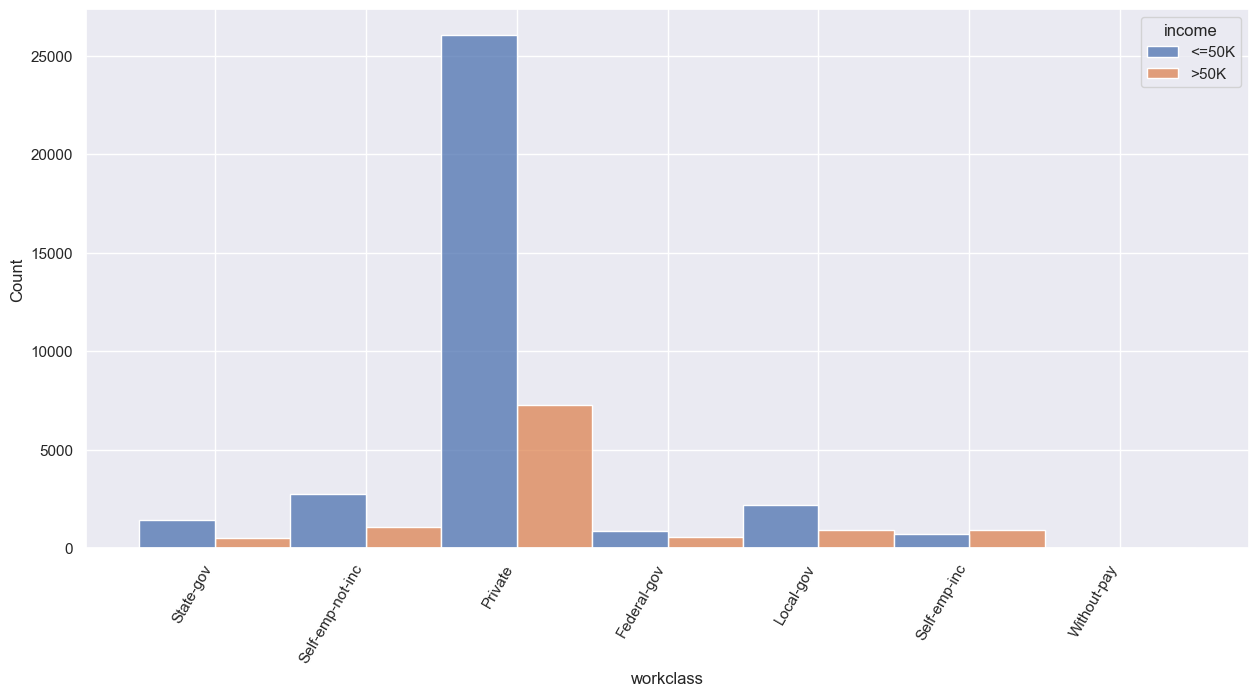

In [18]:
chartTrabalho1 = sns.histplot(data=dataset, hue="income", x="workclass", multiple="dodge")
chartTrabalho1.set_xticklabels(chartTrabalho1.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

Vemos no gráfico acima que a grande maioria dos pesquisados pertence ao setor privado, o que faz sentido visto que, considerando o mercado e a sociedade como um todo, os trabalhadores privados sejam a massa dominante, tanto para aqueles que ganham acima de 50K quanto os que não ganham. Mas essa concentração excessiva pode prejudicar o treinamento do modelo ML.

Deste histograma (sem considerar outras features), nós também podemos tirar as seguintes conclusões:

1. Há poucas chances de se ganhar acima de 50K nos governos estaduais (State-gov) e municipais (Local-gov), o que pode desmotivar as pessoas a trabalharem nesses setores
2. Podemos notar que os trabalhadores autonomos incorporados (self-emp-inc) possuem maiores chances de ganhar 50K do que os autonomos não incorporados, ou seja que trabalham para eles mesmos

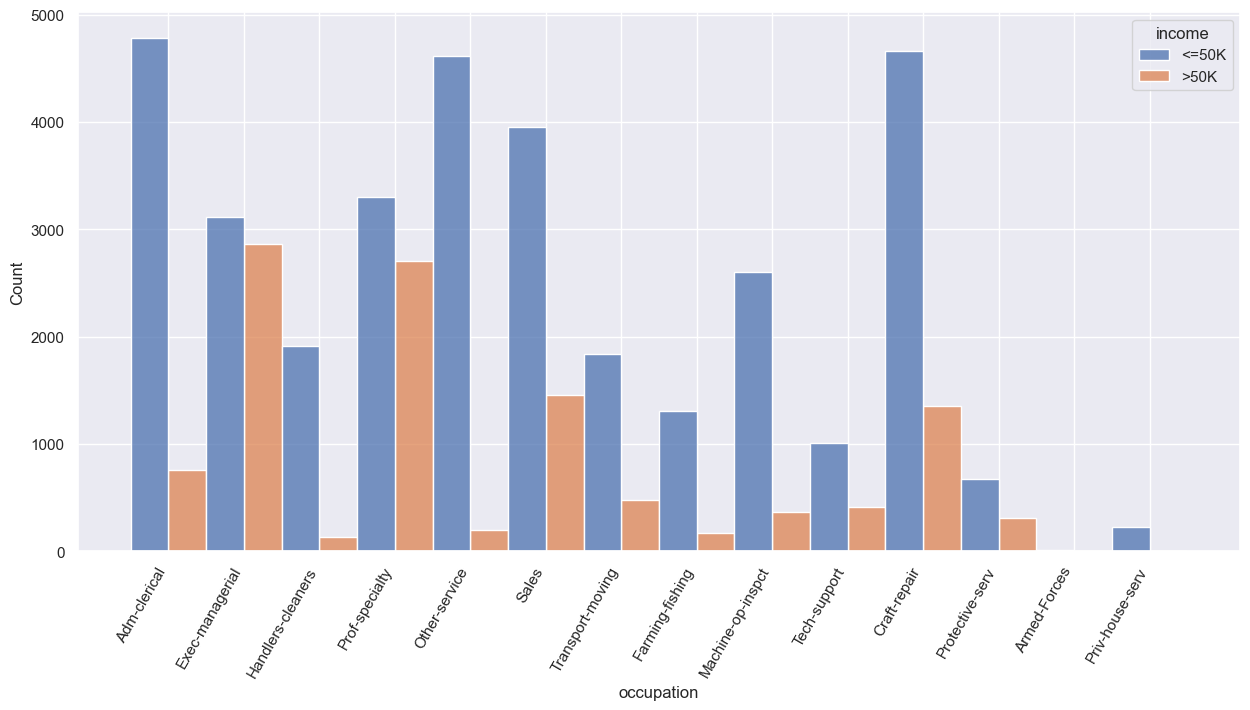

In [19]:
chartTrabalho2 = sns.histplot(data=dataset, hue="income", x="occupation", multiple="dodge")
chartTrabalho2.set_xticklabels(chartTrabalho2.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

Neste histograma, vemos que há uma boa distribuição de profissão exercidas, o que ajudará no treinamento do modelo. Deste histograma (sem considerar outras features), nós também podemos tirar as seguintes conclusões:

1. Certas ocupações não proporcionam rendimentos acima de 50K como "Handlers-cleaners" e "Adm-clerical".
2. Pessoas que tenham as ocupações "Exec-managerial" e "Prof-speciality" possuem maiores chances de ganharem acina de 50K, isso porquê são trabalhos que demandam especialização ou que tenham funções de executivo

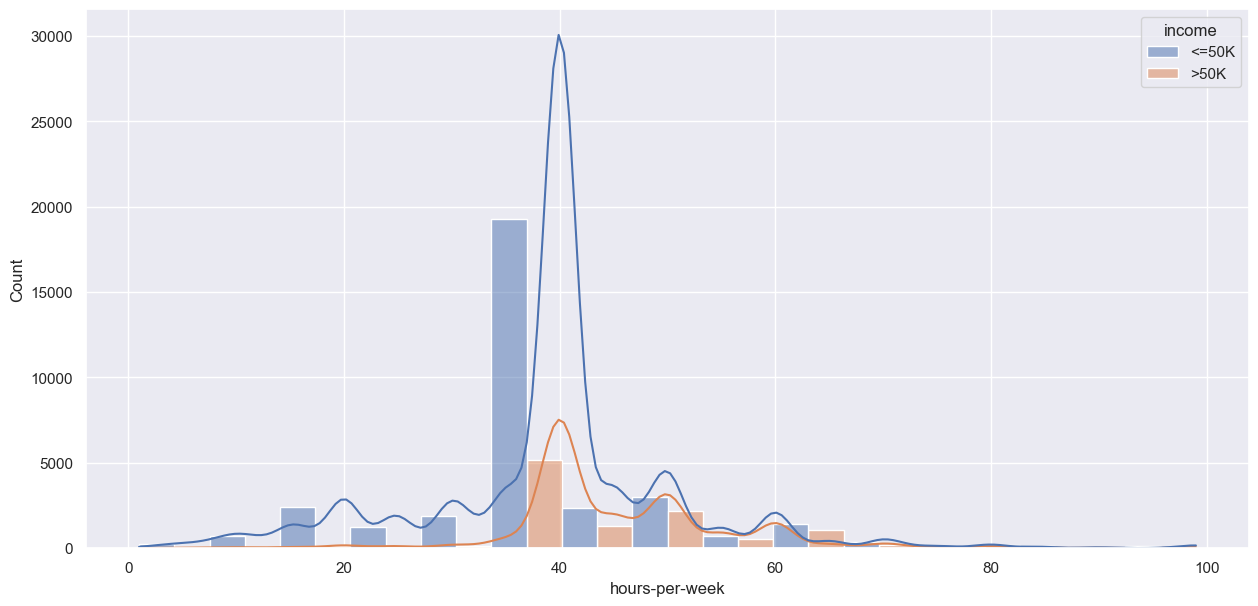

In [20]:
chartTrabalho3 = sns.histplot(data=dataset, hue="income", x="hours-per-week", bins=15, multiple="dodge", kde=True)
plt.show()

Neste histograma, podemos ver claramente que há uma grande concentração entre 20 e 60 horas de trabalho por semana, com a maior parte dos pesquisados trabalhando 40 horas. Isso mostra que o mercado de trabalho possui flexibidade nesse quesito, mas que sempre buscam o marco 40 horas por semana (oito horas por dia) com as horas extras não extendendo mais do que 20 horas por semana.

#### 3.2.2 Educação

Nesta secção, visualizaremos as features: "education" e "education-num", que estão relacionados ao nível acadêmico da pessoa. Deve-se observar que como essa pesquisa foi feita nos EUA, cujo sistema educacional difere do brasileiro.

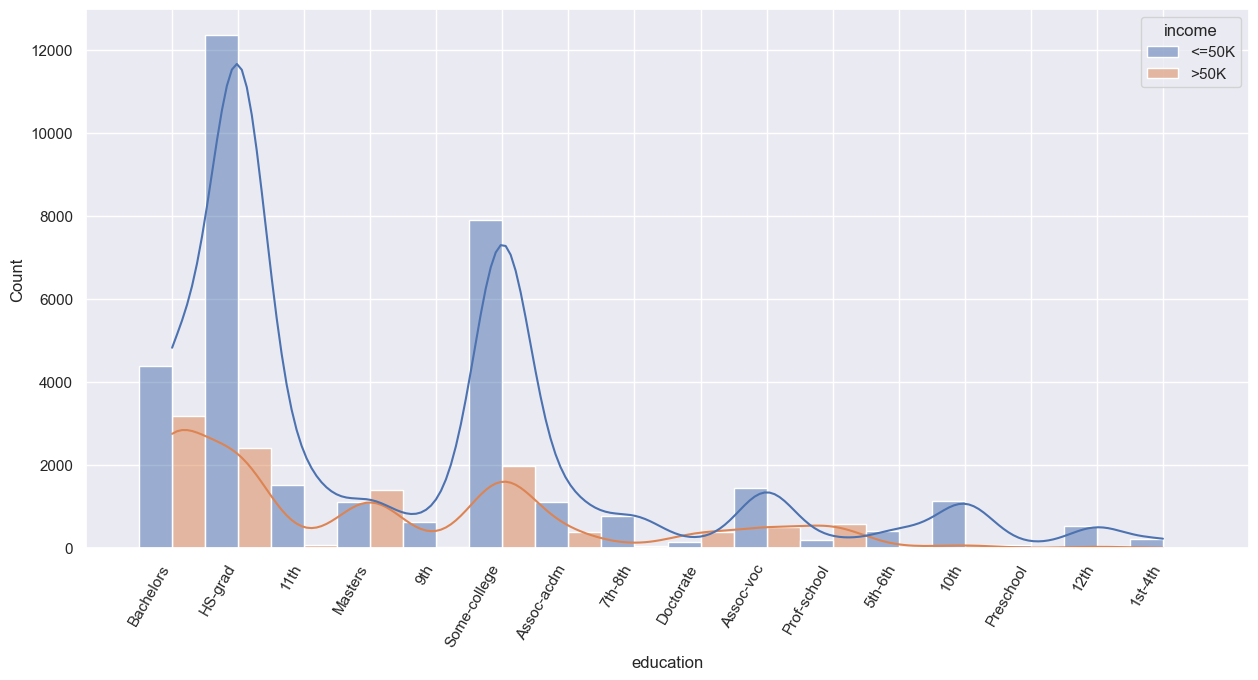

In [21]:
chartEducacao1 = sns.histplot(data=dataset, hue="income", x="education", multiple="dodge", kde=True)
chartEducacao1.set_xticklabels(chartEducacao1.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

Como pode-se observar, os niveis de educação dos pesquisados possui uma concentração nas classes "HS-grad", que seria o equivalente ao nosso 9° ano, "Bachelors", que são nossos bachareis, e "Some-college", que são aqueles que possuem algum crédito escolar (específico do sistema educacional dos EUA). Podemos ver também que uma relação entre o nível de escolaridade e o rendimento da pessoa em que pessoas com doutorado por exemplo tenham mais chances de ganhar acima de 50K do que pessoas com apenas o nosso ensino médio.

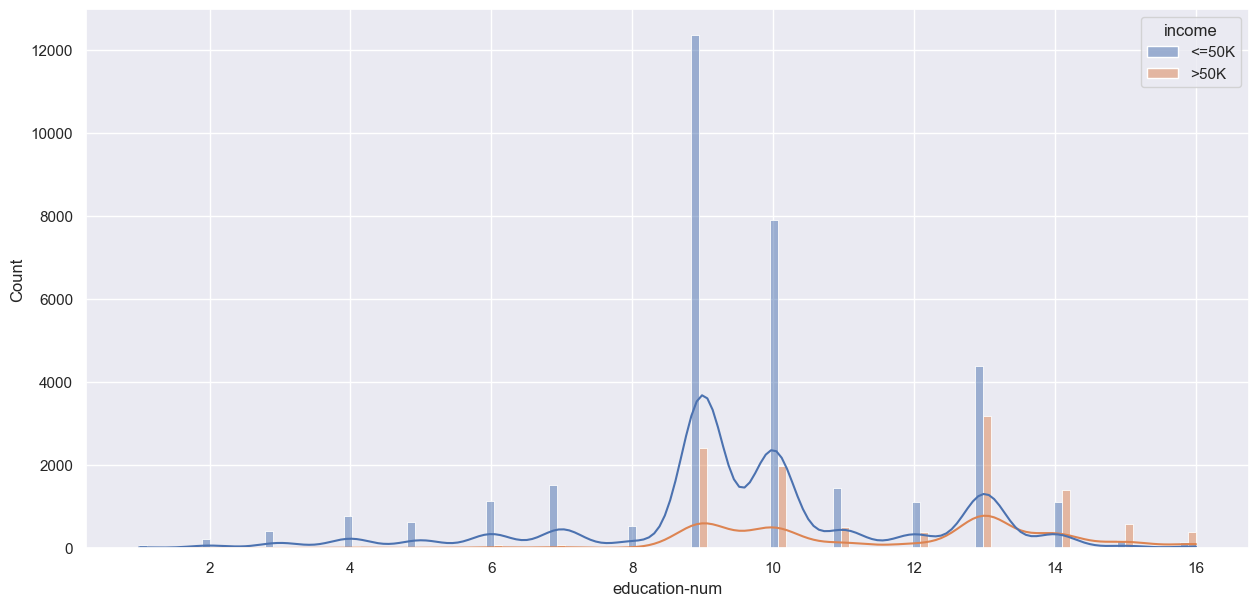

In [22]:
chartEducacao2 = sns.histplot(data=dataset, hue="income", x="education-num", multiple="dodge", kde=True)
plt.show()

No gráfico acima, podemos ver claramente que a grande maioria dos pesquisados possuem mais de oito anos de estudos. Além disso, quase a totalidade de pessoas que ganham acima de 50K possuem no mínimo nove anos de estudo, mostrando uma relação entre rendimentos mais altos e maior tempo de estudo, embora não se possa afirmar que se você tiver mais anos de estudo obrigatóriamente você tera uma remuneração mais alta.

#### 3.2.3 Relacionamentos

Nesta secção, visualizaremos as seguintes features: "marital-status" e "relationship;" que são as que estão relacionados os relacionamentos pessoais do pesquisado.

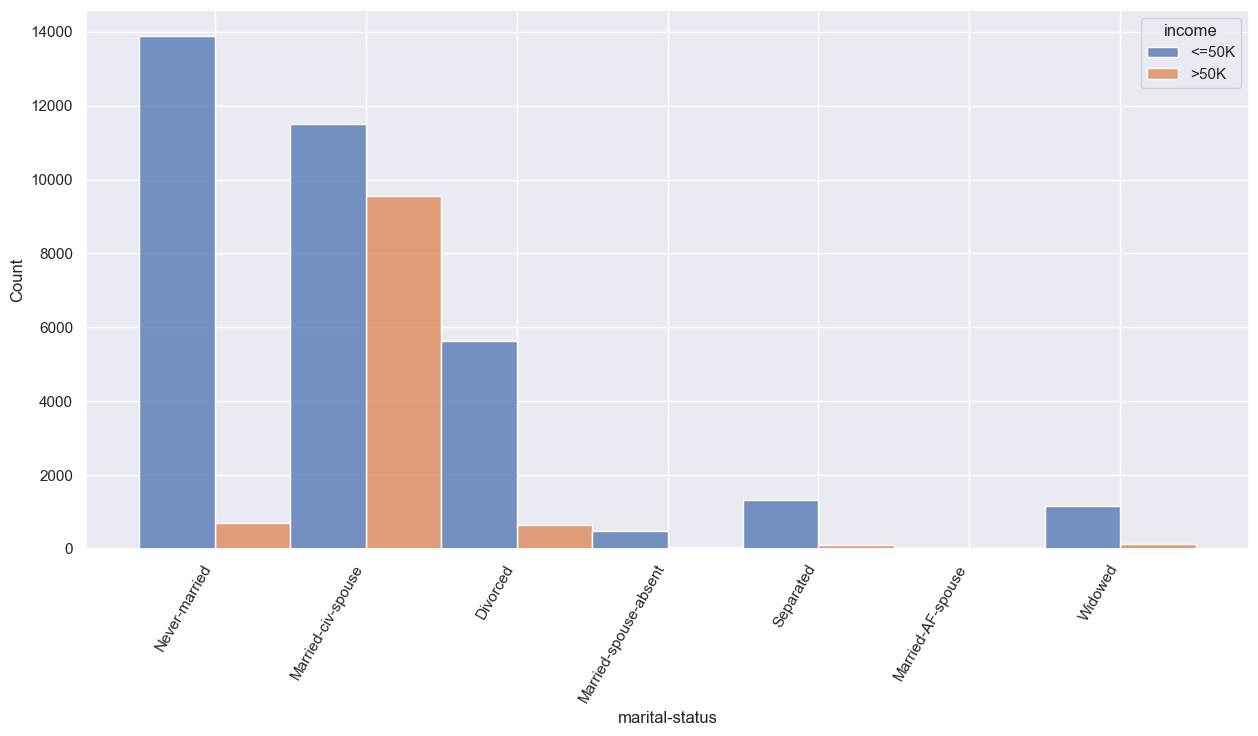

In [23]:
chartRelacionameto1 = sns.histplot(data=dataset, hue="income", x="marital-status", multiple="dodge")
chartRelacionameto1.set_xticklabels(chartRelacionameto1.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

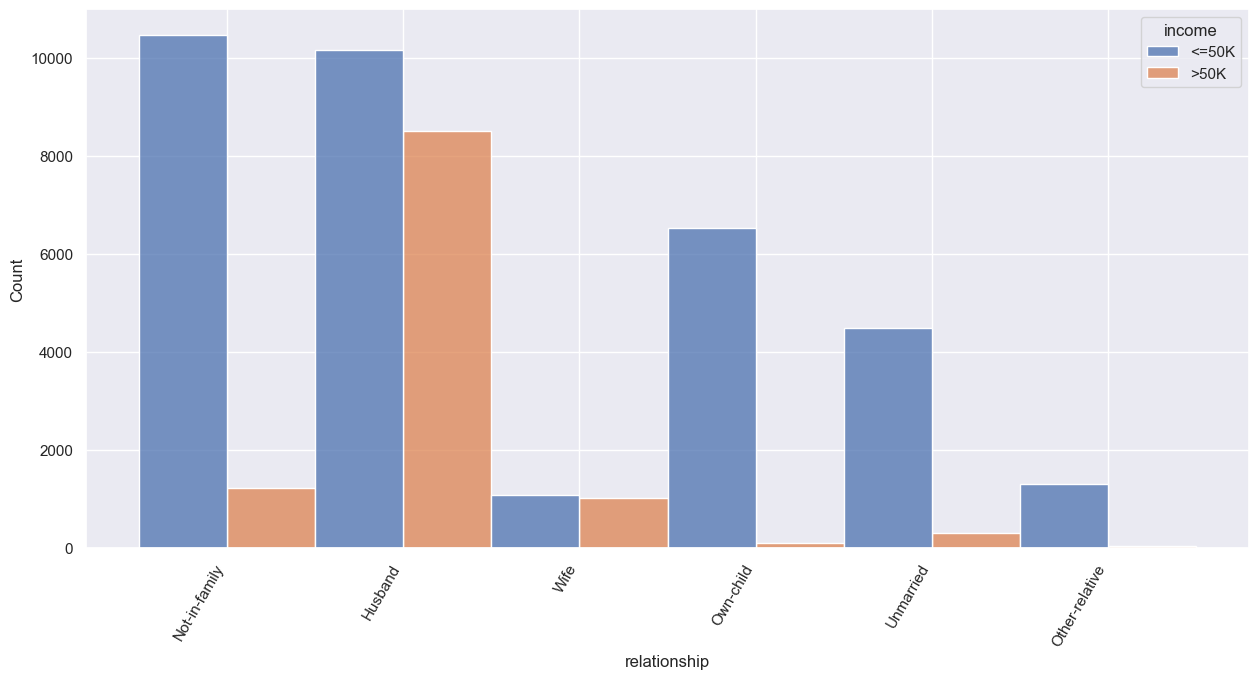

In [24]:
chartRelacionameto2 = sns.histplot(data=dataset, hue="income", x="relationship", multiple="dodge")
chartRelacionameto2.set_xticklabels(chartRelacionameto2.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

Nos dois gráficos acima, podemos fazer as seguintes deduções:

1. Grande parte dos pesquisados é casado civilmente ou nunca se casou;
2. Grande parte dos entrevistados se declararam como marido ou mulher na família, o que coincide com o fato de grande parte dos pesquisados serem casados civilmente;
3. Podemos ver que aqueles que são casados e no topo da estrutura familiar (marido ou esposa) possuem maiores chances de ter um rendimento acima de 50K, o que pode ser explicado tanto pelo apoio da própria família ou pelo fato do pesquisado ter juntado o seu rendimento com o de seu conjuge.

#### 3.2.4 Pessoa

Nesta secção, visualizaremos as seguintes features: "race", "sex", "
ge"*,  "
native-couny"**; que são as que estão relacionados caracteristicas físicas do pesquisa.oa

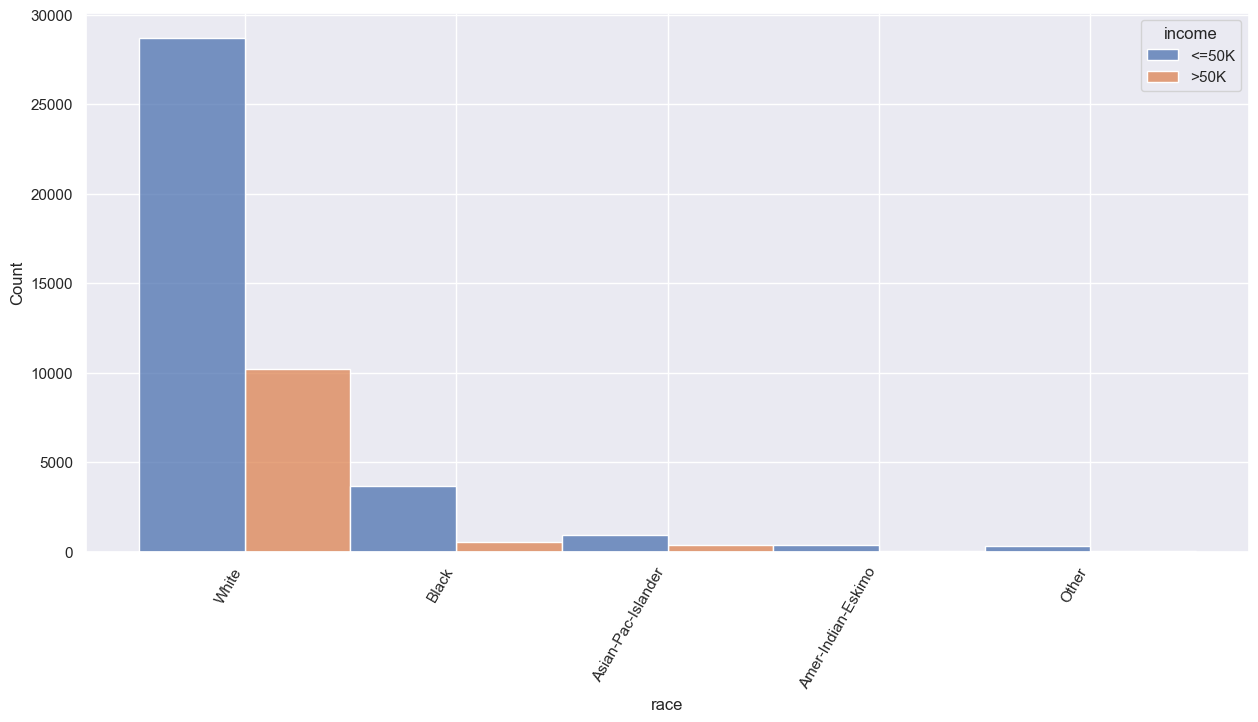

In [25]:
chartPessoa1 = sns.histplot(data=dataset, hue="income", x="race", multiple="dodge")
chartPessoa1.set_xticklabels(chartPessoa1.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

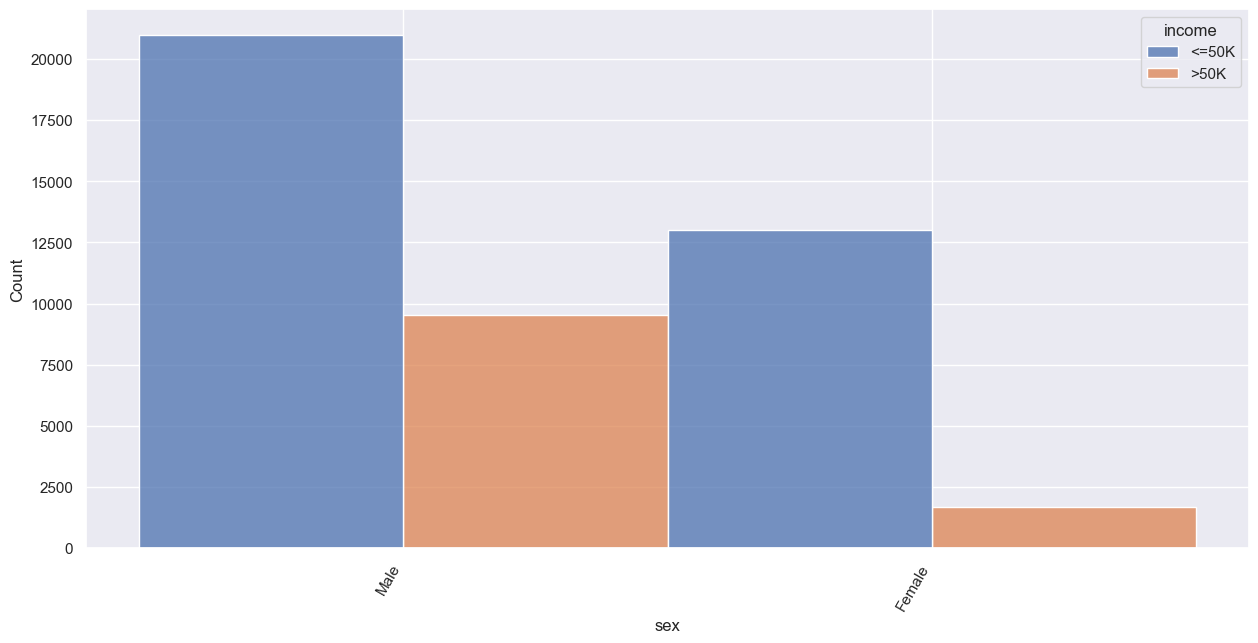

In [26]:
chartPessoa2 = sns.histplot(data=dataset, hue="income", x="sex", multiple="dodge")
chartPessoa2.set_xticklabels(chartPessoa2.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

No primeiro gráfico acima, podemos ver que a grande maioria dos pesquisados são brancos ou se declararam como brancos, que confirma a atual demografia americana que mostra que cerca de 60% dos americanos são de etnia branca (https://usafacts.org/data/topics/people-society/population-and-demographics/our-changing-population/). Também podemos confirmar dois pontos negativos da sociedade em geral:

1. A proporção de brancos que ganham acima de 50K é muito superior à proporção de negros que ganham acima de 50K;
2. A proporção de homens que ganham acima de 50K é muito superior à proporção de mulheres que ganham acima de 50K

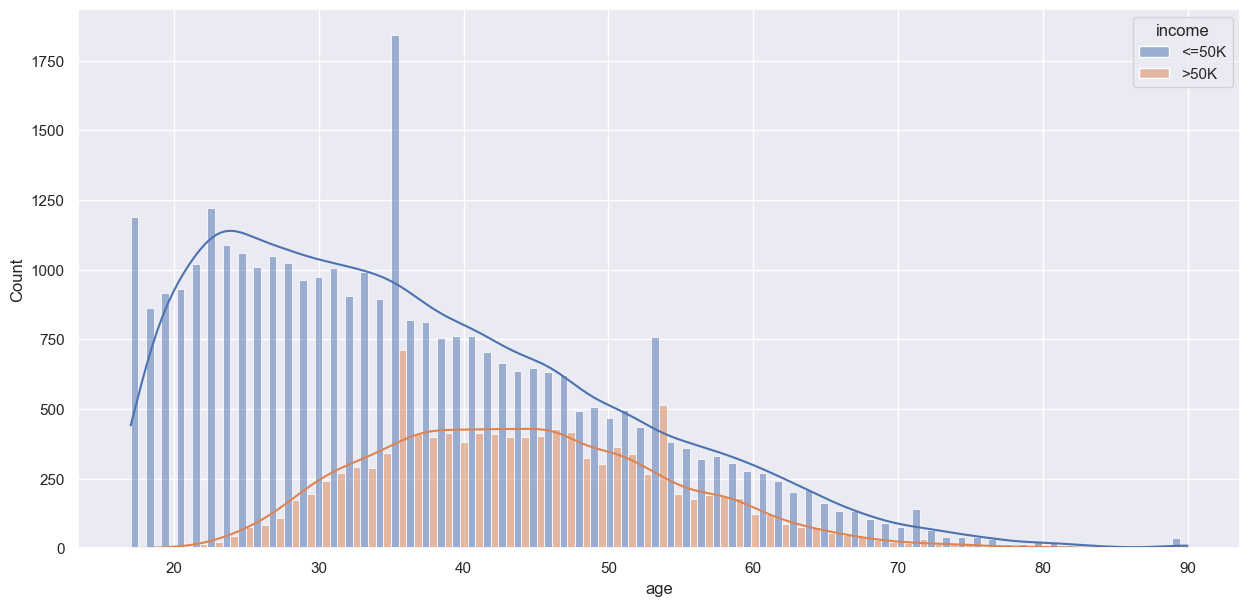

In [27]:
chartPessoa2 = sns.histplot(data=dataset, hue="income", x="age", multiple="dodge", kde=True)
plt.show()

Neste gráfico podemos ver que aqueles que os mais jovens, e consequentemente estão iniciando suas carreiras no mercado de trabalho, possuem rendimentos abaixos de 50K. Conforme o avançar dos anos, vemos que o percentual de pessoas que ganham acima de 50K vai aumentando, alcançando seu pico entre 40 e 50 anos onde as curvas de densidade começam a ter uma equidistância até os 70-80 anos, o que bate com a expectativa de vida média dos EUA.

#### 3.2.5 Investimentos

Nesta secção, visualizaremos as seguintes features: "capital-loss" e "capital-gain"; que são as que estão relacionados a vida profisional da pessoa

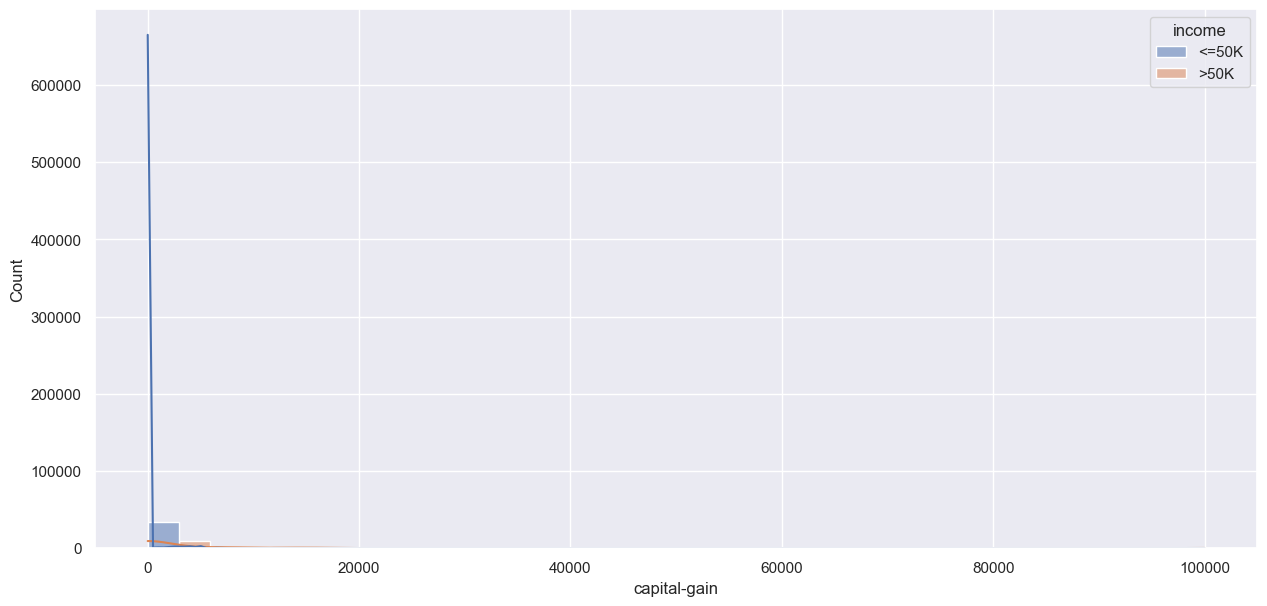

In [28]:
chartInvestimento1 = sns.histplot(data=dataset, hue="income", x="capital-gain", multiple="dodge", kde=True)
plt.show()

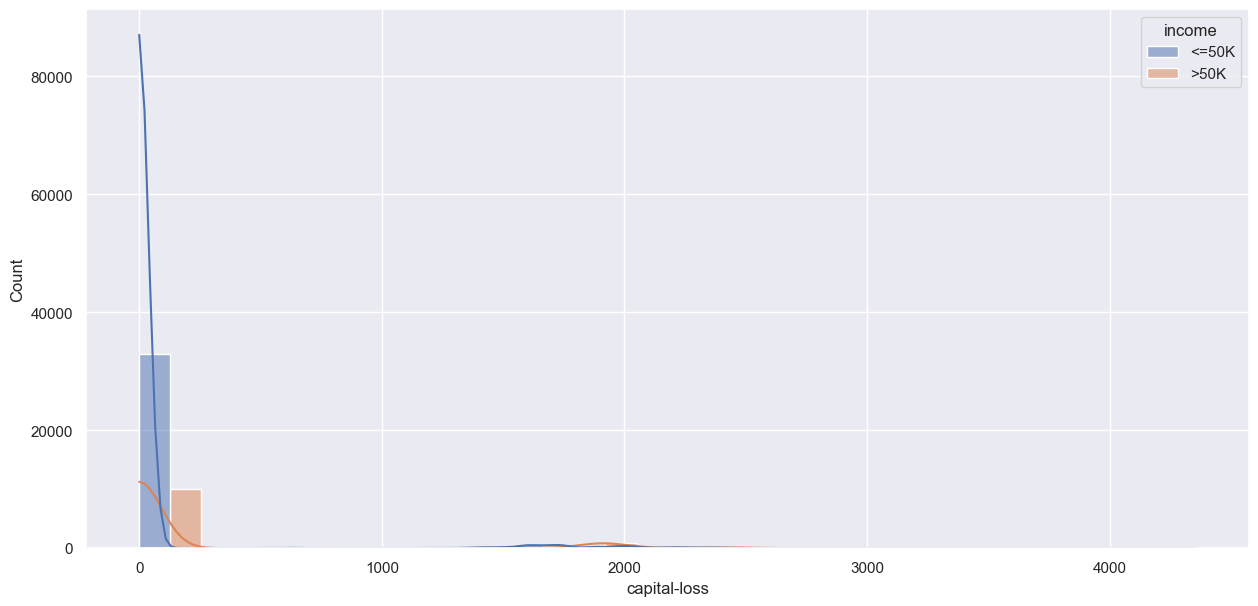

In [29]:
chartInvestimento2 = sns.histplot(data=dataset, hue="income", x="capital-loss", multiple="dodge", kde=True)
plt.show()

Nos dois gráficos acima, podemos ver que ambos a perda e ganho de capital estão muito concentrados, o que não nos dá uma relação clara entre ganho/perda de capital com rendimentos acima ou abaixo de 50K.

### 3.3. Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma relação entre os atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos.

Vamos agora verificar a covariância entre as variáveis numéricas do dataset, que representa como duas variáveis numéricas estão relacionadas. Neste caso usaremos o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis,
* Próximo de +1: há uma correlação positiva entre as variáveis.
* 0: não há correlação entre as variáveis.

<i>OBS: Apenas atributos numéricos podem ser avaliados por esse método. Atributos categóricos precisam ser codificados primeiro, o que será feito em passo posterior</i>

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A **matriz de correlação** exibe graficamente a correlação entre os atributos numéricos do dataset estão mais distantes um do outro na ordenação.

Abaixo é mostrado a matriz de correlação, que exibe graficamente a correlação entre os atributos numéricos do dataset, se estão mais distantes um do outro na ordenação.

<Axes: >

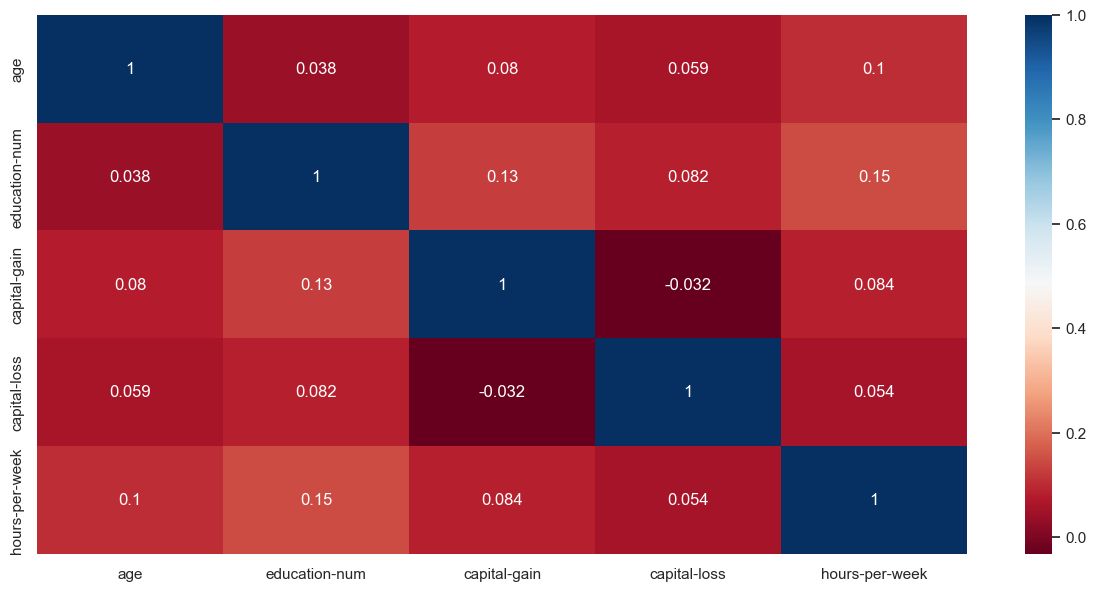

In [30]:
sns.heatmap(dataset[["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]].corr(), annot=True, cmap='RdBu')

Iremos também utilizar o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos numéricos do dataset, usando o Seaborn. Os atributos categóricos ficam de fora desse gráfico.

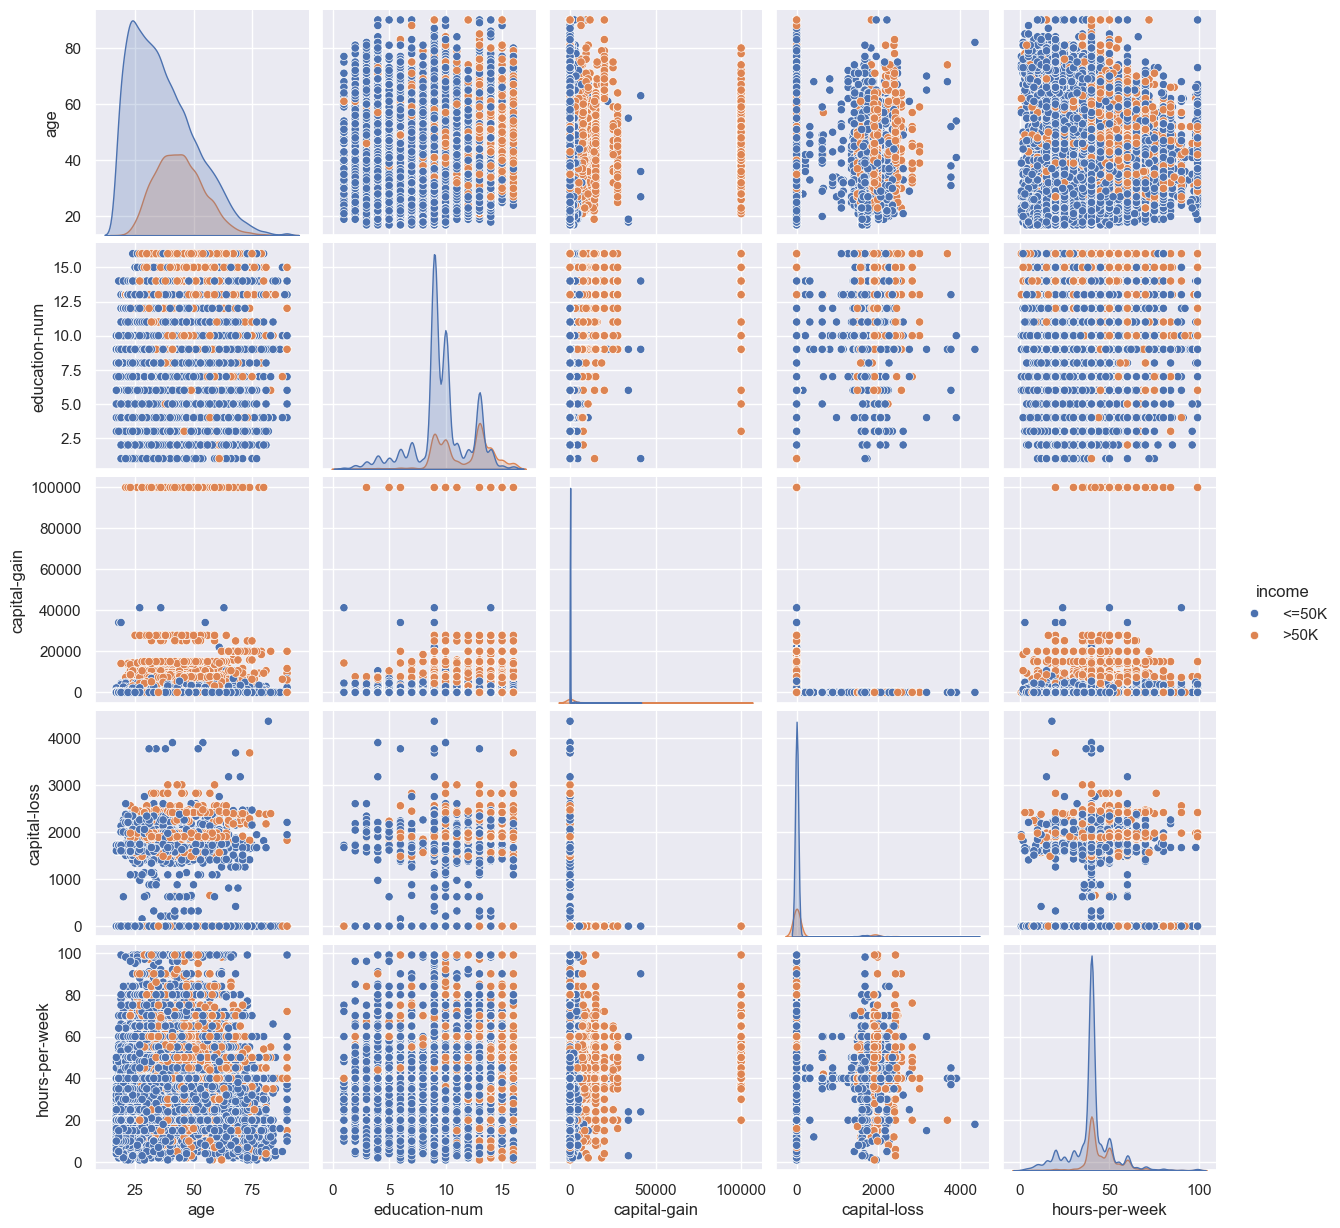

In [31]:
# Scatter Plot com Seaborn

sns.pairplot(dataset, hue = "income", height = 2.5);

A partir do gráfico de dispersão entre os atributos "age", "hours_per_week" e "income", observamos que uma pessoa que tenha mais de 30 anos é mais propensa a ganhar mais de 50K, caso contrário, precisa trabalhar pelo menos 60 por semana para ter a mesma propensão.

## 4. Pré-Processamento de dados

Nesta etapa, iremos realizar o tratamento dos dados para a etapa de treinamento do modelo. Com base nas análises que fizemos até agora, iremos fazer os seguintes tratamentos:

1. Fazer a codificação (one-hot-enconding) dos atributos categóricos;
2. Balanceamento das classes.

Começaremos com o one-hot-encoding dos atributos categóricos, cuja finalidade é converter valores strings para numéricos já considerando seu uso em um algoritimo ML. Entretanto, devemos observar que os valores de certos atributos possuem uma ordem natural, o que é chamado de variavel categórica ordinal. Para esse tipo de variavel, iremos utilizar o OrdinalEncoder enquanto que o restando será codificado usando o one-hot-encoding.

A seguir, qual atributo utilizará qual codificação:

1. **OrdinalEncoder**: education;
2. **One-Hot-Encoding**: workclass, marital-status, occupation, relationship, race, sex, native-country

In [32]:
codedDataset = dataset.copy(deep=True)

In [33]:
# Codificação da coluna "education" dando ao OrdinalEncoder uma lista com a ordem dos niveis educacionais existentes
ordinalEncoder = OrdinalEncoder(categories=[["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", 
                                 "12th", "HS-grad", "Prof-school", "Some-college", "Assoc-acdm", "Assoc-voc", 
                                 "Bachelors", "Masters", "Doctorate"]])

codedDataset["education"] = ordinalEncoder.fit_transform(codedDataset[["education"]])

In [34]:
# Codificação das outras colunas string com o OneHotEncoder

atributosNominais = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

# Para cada atributo nominal, será feita a codificação, a tranformação do resultado em dataframe e a concatenação no dataset
for atributo in atributosNominais:

    # Criação do codificador nominal
    nominalEncoder = OneHotEncoder(sparse=False)
    valores = nominalEncoder.fit_transform(codedDataset[[atributo]])

    # Criação do dataframe com os valores codificados e sua concatenação com o dataset principal
    dfAtributos = pd.DataFrame(data=valores, columns=np.array(nominalEncoder.categories_).ravel())
    codedDataset = pd.concat([codedDataset,dfAtributos], axis=1)

    # Exclusão da coluna original
    codedDataset.drop(atributo, axis=1, inplace=True)

Como podemos ver o resultado abaixo, todas os atributos do dataset agora estão em formato numérico.

In [35]:
codedDataset.head(5)

,age,education,education-num,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,13.0,13,2174,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,13.0,13,0,0,13,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,8.0,9,0,0,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,6.0,7,0,0,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,13.0,13,0,0,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para o balanceamento de classe, iremos usar o método Undersampling, que consiste em manter os dados da classe com menor frequencia e diminuir os dados das classes com mais frequencia. Para isso usaremos a biblioteca do SKLearn "imbalanced-learn". Como o retorno da função que faz o Undersampling retorna um conjunto X e Y, nessa parte nós iremos separar o dataset em X (atributos) e Y (classe).

In [36]:
X = codedDataset.drop("income", axis=1)
Y = codedDataset["income"]

In [37]:
# Definição da estratégia de undersampling
undersample = RandomUnderSampler(sampling_strategy=0.4)

X_under, Y_under = undersample.fit_resample(X, Y)

In [38]:
Y_under.value_counts()

income
<=50K    28020
>50K     11208
Name: count, dtype: int64

Como podemos ver na linha acima, a relação entre as classes agora é de 40%

### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 70% do conjunto de dados para modelagem e guardaremos 30% para teste, usando o train-test-split da niblioteca SKLearn. 

Como na etapa anterior nós já fizemos a separação entre atributos e classe, agora nós especificaremos o tamanho do conjunto de teste desejado e uma semente (que garantirá que resultados sejam replicaveis em qualquer ambiente). E por fim, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.



In [39]:
test_size = 0.30
seed = 7

# Separação em conjuntos de treino e teste (dataset modificado)
X = X_under
y = Y_under
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed)

Deste ponto em diante, temos todas os insights necessários pra prosseguir com o treinamente de um algoritimo supervisionado.

## Conclusão

Durante o decorrer deste trabalho, pudemos ver um pouco de como altos ou baixos rendimentos está distribuídos pela sociedade dos EUA. Notamos que alguns grupos sociais possuem certa diculdade para ganhar acima de 50K, como negros e mulheres, o que certamente precisa de uma atenção do poder público. Também notamos que diferente do Brasil, onde cargos públicos estão associados com bons rendimentos, nos EUA isso não acontece.

Sobre o mercado de trabalho dos EUA, vemos que há uma tendência em manter as horas de trabalho semanais entre 40 e 60 horas e que o setor privado é de longe o que mais emprega.

A educação e a experiência também desempenham um papel importante sobre o rendimento das pessoas, com aquelas que tem uma maior especialização (mestrados e doutorados) e tempo acadêmico terem maiores chances ter ter rendimentos acima de 50K. Pessoas mais jovens e consequentemente mais novas no mercado de trabalho, por possuirem cargos mais operacionais, possuem chances de terem rendimentos menores do que pessoas que tenham acima de 30 anos por exemplo.

Por fim toda essa pré-análise serve como uma base sólida para a construção de modelos que podem prever baseadas na vida profissional e pessoal de alguém, se a mesma poderá ter uma renda acima de 50K.